**Linear Regression: California Housing Datset**

Linear Regression is one of the most fundamental algorithms in Machine Learning. It models the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a linear equation.

Goal: Predict the median house value in California districts using features like income, housing median age, average rooms, etc.

**Step 1: Import Libraries:-** Load essential Python libraries for data manipulation (numpy, pandas), visualization (matplotlib, seaborn), machine learning (scikit-learn for model building, preprocessing, and evaluation), and the California Housing dataset.

In [35]:
# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dataset
from sklearn.datasets import fetch_california_housing


**Step 2: Load and Prepare Dataset:-** In this step, we load the California Housing dataset using fetch_california_housing(), convert it into a pandas DataFrame, and add the target variable (MedHouseVal). We then separate the dataset into features (X) and target (y) to prepare it for model training.

In [36]:
# Load the California Housing dataset
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target # Add the target variable to the DataFrame

# Separate features (X) and target (y)
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

**Step 3: Data Inspection:-** Check for missing values using isnull().sum() and get a statistical summary of the dataset with describe() to understand the data distribution and identify any potential issues.

In [37]:
print(df.isnull().sum())  # Check for missing values
print(df.describe())      # Get statistical summary


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000

**Step 4:Exploratory Data Analysis (EDA)**

The first visualization is a correlation heatmap, which displays the pairwise correlation coefficients between all numeric variables in the dataset. Using a red-to-blue color scheme, positive correlations are highlighted in warm colors and negative correlations in cool colors, with the actual values annotated on the heatmap. This visualization provides a quick way to identify strong relationships between variables, detect multicollinearity, and guide feature selection for modeling or further analysis. It gives an overall picture of how the dataset’s variables interact with each other.

The second visualization is a scatter plot examining the relationship between Median Income (MedInc) and Median House Value (MedHouseVal). Each point represents a record in the dataset, allowing us to observe trends, clusters, or outliers. This focused view helps in understanding how median income impacts housing values, complementing the broader insights from the heatmap. Together, these two visualizations provide both an overview and a detailed perspective on the dataset, supporting effective exploratory data analysis.

Correlation Heatmap


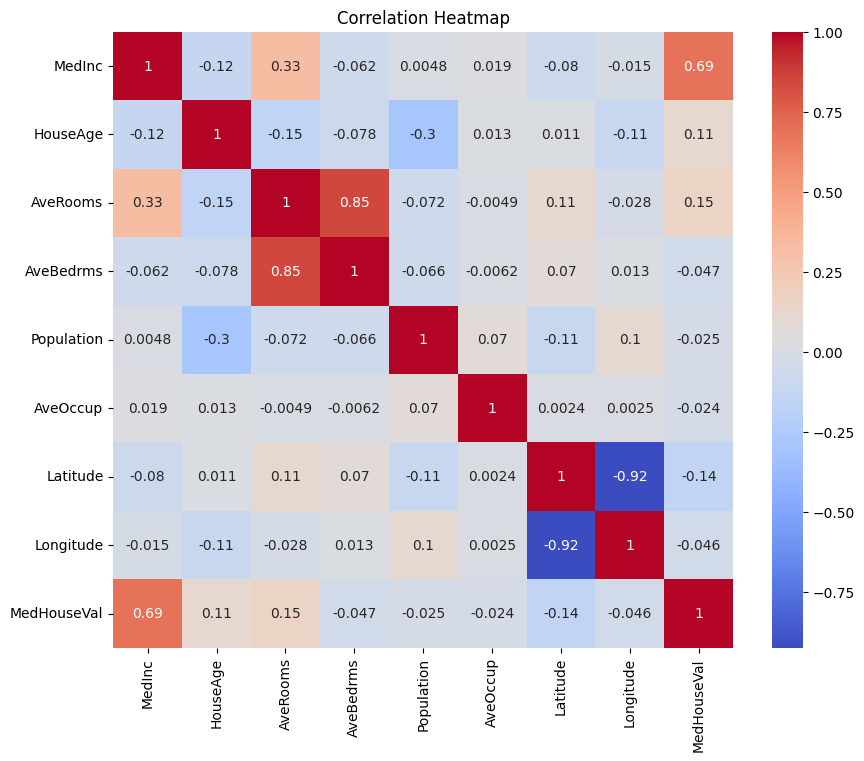

Median Income vs Median House Value


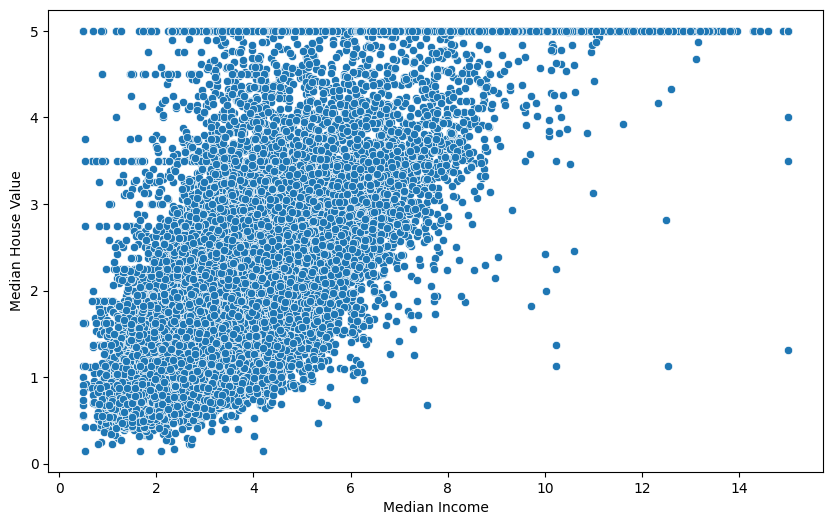

In [38]:
# Section 1: Correlation Heatmap
print("Correlation Heatmap") # Replaced st.header with print
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', ax=ax)
ax.set_title("Correlation Heatmap")
plt.show() # Replaced st.pyplot with plt.show()

# Section 2: Scatter Plot
print("Median Income vs Median House Value") # Replaced st.header with print
fig2, ax2 = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=df['MedInc'], y=df['MedHouseVal'], ax=ax2)
ax2.set_xlabel("Median Income")
ax2.set_ylabel("Median House Value")
plt.show(fig2) # Replaced st.pyplot with plt.show()

This section generates histograms for all numeric features in the dataset, providing a visual summary of their distributions. Each histogram uses 30 bins and is displayed in a neatly arranged grid with a sky-blue color for clarity. These plots help identify patterns such as skewness, outliers, or approximate normality in the data, making them a valuable tool for exploratory data analysis and guiding preprocessing decisions.

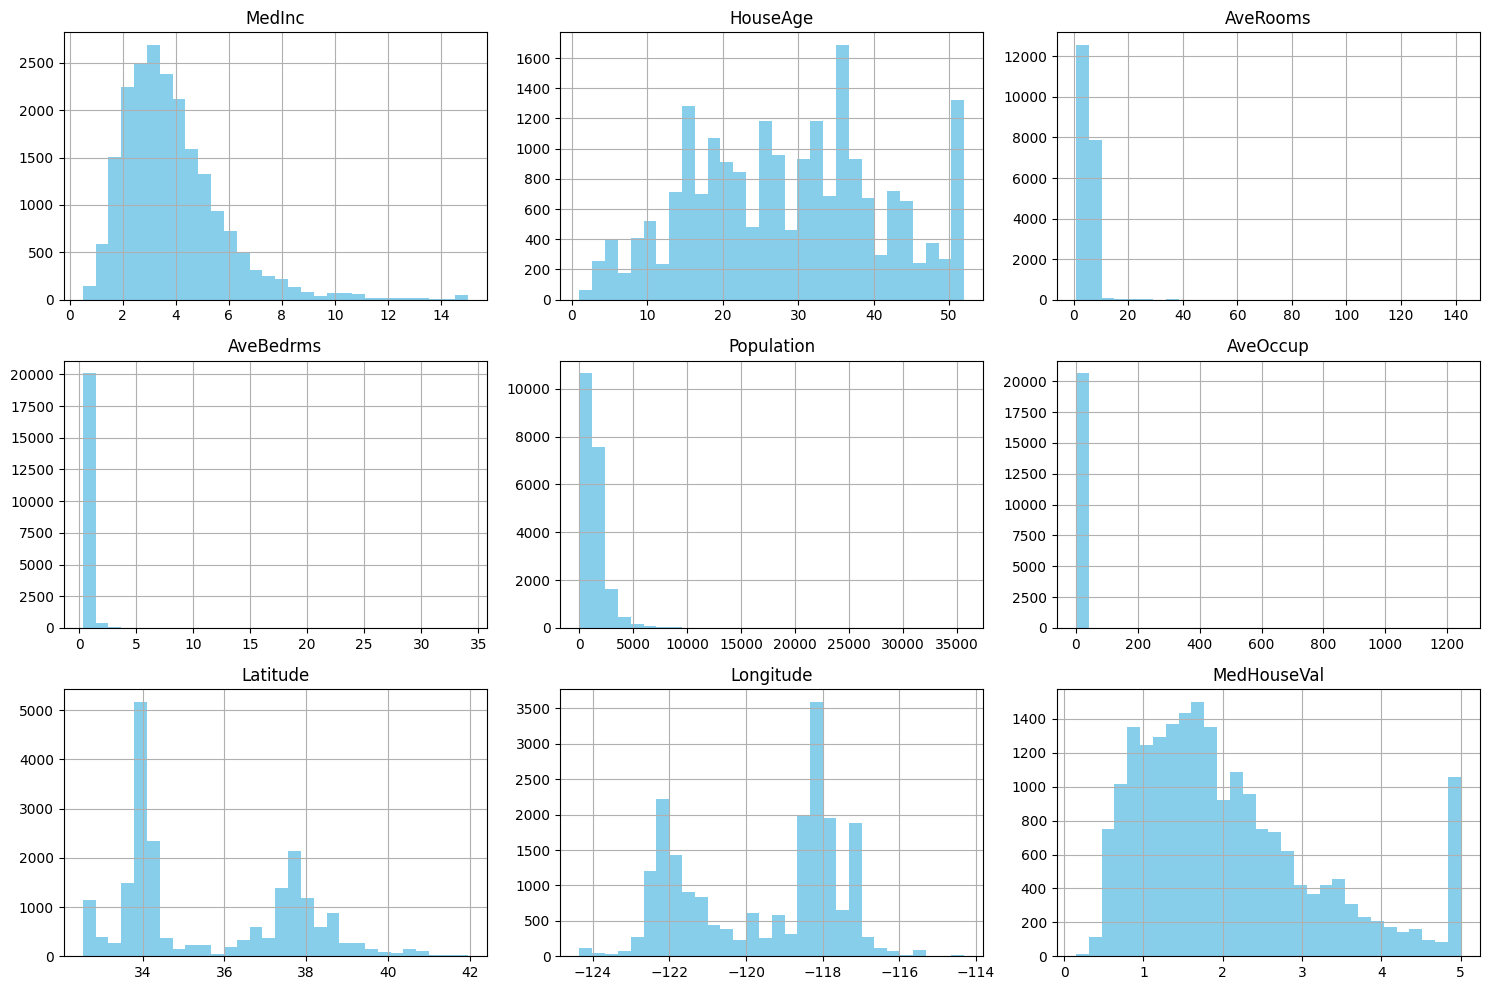

In [39]:
# Histogram for all features
df.hist(bins=30, figsize=(15,10), color='skyblue')
plt.tight_layout()
plt.show()

This pairplot visualizes relationships and distributions among selected key features, helping to identify trends, correlations, and patterns in the data.

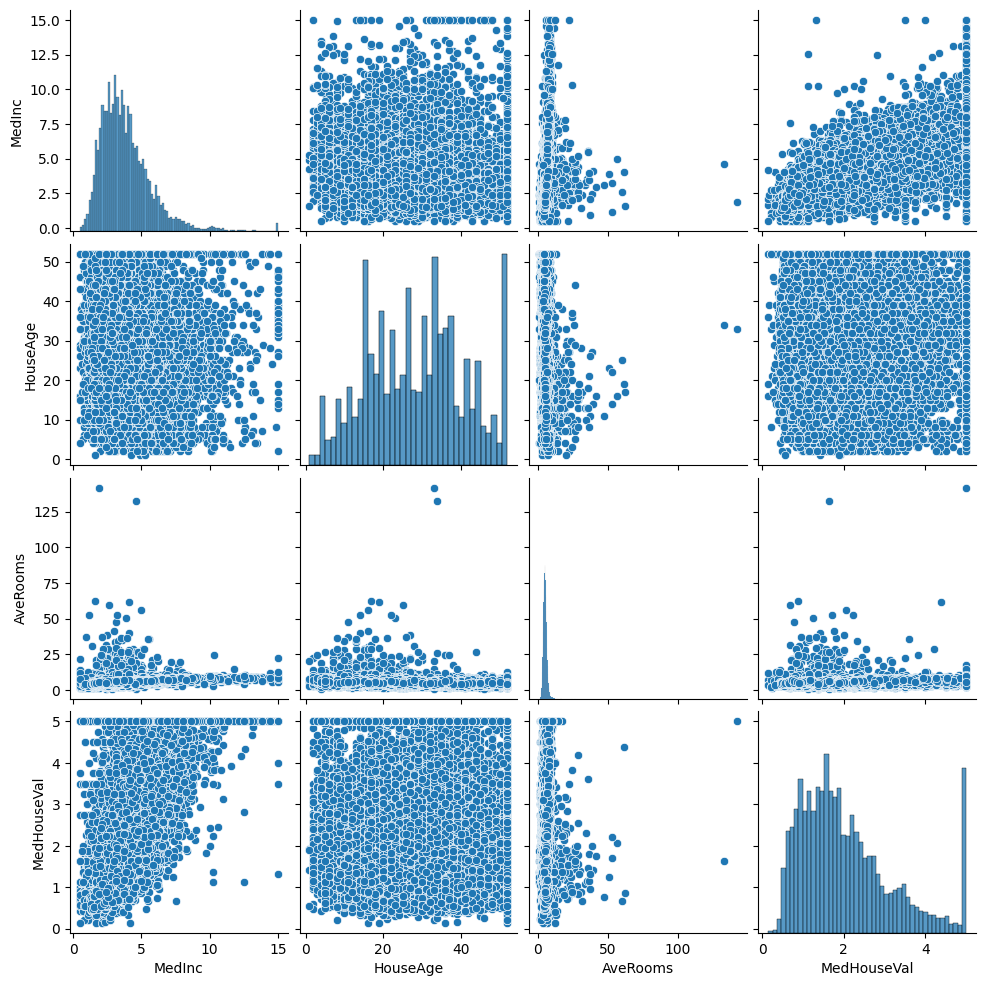

In [40]:
# Pairplot for selected important features
sns.pairplot(df[['MedInc', 'HouseAge', 'AveRooms', 'MedHouseVal']])
plt.show()



This plot shows the distribution of Median House Value using a histogram with a KDE curve, highlighting the frequency and overall shape of the data.

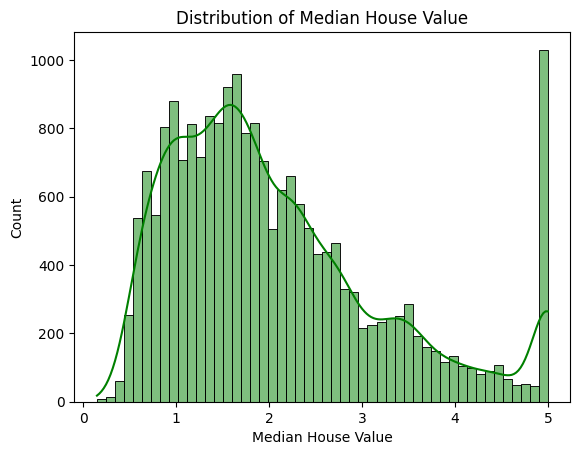

In [41]:
sns.histplot(df['MedHouseVal'], bins=50, kde=True, color='green')
plt.xlabel("Median House Value")
plt.ylabel("Count")
plt.title("Distribution of Median House Value")
plt.show()


**Step 5: Train-Test Split**

In this step, we split the dataset into training and testing sets using train_test_split from scikit-learn. 80% of the data is used for training the model, while 20% is reserved for testing. This ensures that the model is trained on one subset and evaluated on unseen data, helping to assess its generalization performance.

In [42]:
from sklearn.model_selection import train_test_split

# Split dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


**Step 6: Feature Scaling:**

Linear Regression performs better when features are on a similar scale. Here, we use StandardScaler from scikit-learn to standardize the features by removing the mean and scaling to unit variance. The scaler is fitted on the training data and then applied to both training and test sets to maintain consistency.

In [43]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Step 7: Train Linear Regression Model**

This code creates and trains a linear regression model using scikit-learn. The model is fitted on the scaled training features (X_train_scaled) and the corresponding target values (y_train) to learn the underlying linear relationships between the input variables and the target.

In [44]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)


LinearRegression()

In [45]:
# Make Predictions
y_pred = lr_model.predict(X_test_scaled)

**Step 8: Evaluate The Model:-**

This code evaluates the performance of the trained regression model using standard metrics. It calculates the Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R² score by comparing the predicted values (y_pred) with the actual target values (y_test). These metrics provide insights into the model’s accuracy, error magnitude, and how well it explains the variance in the data.

In [46]:
#  Evaluate The Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)



Mean Squared Error (MSE): 0.5558915986952442
Root Mean Squared Error (RMSE): 0.7455813830127763
Mean Absolute Error (MAE): 0.5332001304956565
R² Score: 0.575787706032451


**Step 8:Feature Coefficiesnts:-**

This code displays and visualizes the coefficients of the trained linear regression model, showing how each feature influences the target variable. Positive coefficients indicate a direct relationship, while negative coefficients indicate an inverse relationship. The bar plot provides a clear visual comparison of feature importance.


      Feature  Coefficient
0      MedInc     0.854383
1    HouseAge     0.122546
2    AveRooms    -0.294410
3   AveBedrms     0.339259
4  Population    -0.002308
5    AveOccup    -0.040829
6    Latitude    -0.896929
7   Longitude    -0.869842


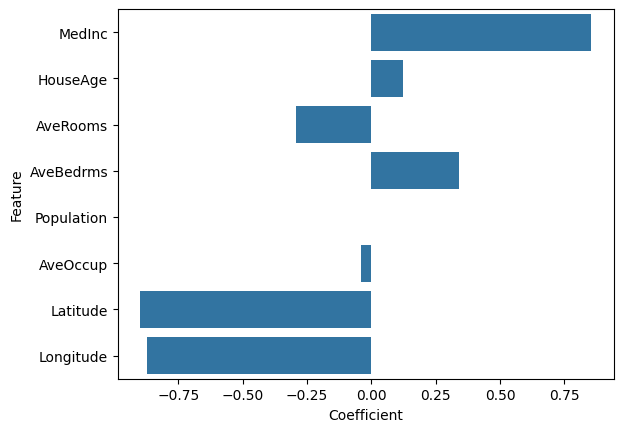

In [47]:

coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": lr_model.coef_})
print(coefficients)

# Optional: visualize
sns.barplot(x="Coefficient", y="Feature", data=coefficients)
plt.show()


**visualize Predictions**

This visualization compares the actual house values (y_test) with the predicted values (y_pred) from the model. Each point represents a data sample, and the red dashed line indicates a perfect prediction where actual and predicted values are equal. The closer the points are to this line, the better the model’s performance. This plot helps assess the model’s accuracy and identify patterns such as underprediction or overprediction.

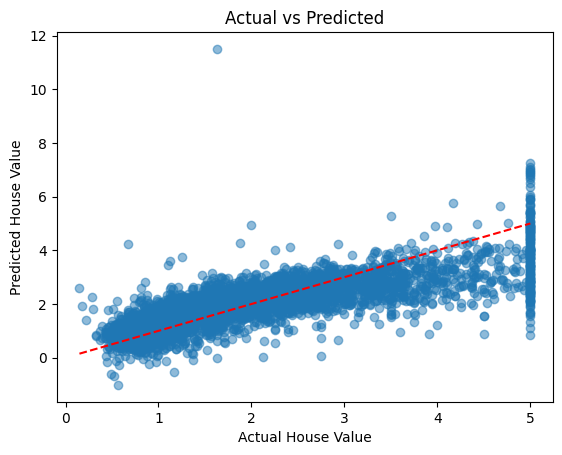

In [48]:
# visualize Predictions
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


**Linear Regression using TensorFlow**

In this project, we implemented Linear Regression on the California Housing dataset using TensorFlow to leverage its flexibility and scalability. Unlike traditional Scikit-learn implementations, TensorFlow allows us to define custom models, control training loops, adjust epochs, and optimize weights using gradient descent efficiently. This approach demonstrates how even classical algorithms like linear regression can benefit from deep learning frameworks for more fine-grained control, experimentation, and potential integration with advanced neural network models in future work.

**Step 1: Import Libraries**

This code imports TensorFlow and Keras to build and train machine learning models, specifically for defining layers, compiling models, and running training loops. Matplotlib is included for visualizing data, model predictions, and training performance.

In [49]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


**Step 2: Scale the data**

In this phase, StandardScaler from Scikit-learn is used to normalize the feature data. Scaling ensures all features have a mean of 0 and a standard deviation of 1, improving training stability and performance of machine learning models, including TensorFlow.

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Step 3: Build the TensorFlow model**

In this phase, a TensorFlow Keras Sequential model is defined for linear regression. The input layer matches the number of features, and a single neuron in the output layer predicts the target variable. The model is compiled using the Adam optimizer and Mean Squared Error (MSE) loss, with Mean Absolute Error (MAE) as an additional metric to monitor performance.

In [51]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    keras.Input(shape=(X_train_scaled.shape[1],)),  # Explicit Input layer
    layers.Dense(1)  # Single output neuron for Linear Regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


**Step 4: Compile the model**

In [52]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


**Step 5: Train the model with epoch tracking**

In this phase, the model is trained on the scaled training data using 50 epochs. An epoch represents one complete pass through the entire training dataset, allowing the model to iteratively adjust its weights to minimize the loss. A validation split of 20% is used to monitor the model’s performance on unseen data during training and help prevent overfitting.

In [53]:

history = model.fit(
    X_train_scaled, y_train,
    epochs=50,
    validation_split=0.2,  # Reserve 20% of training data for validation
    verbose=1
)


Epoch 1/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6.0548 - mae: 1.9774 - val_loss: 4.3096 - val_mae: 1.6966
Epoch 2/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.8191 - mae: 1.5793 - val_loss: 2.9976 - val_mae: 1.3480
Epoch 3/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6136 - mae: 1.2481 - val_loss: 2.1047 - val_mae: 1.0490
Epoch 4/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8857 - mae: 0.9652 - val_loss: 1.5038 - val_mae: 0.8201
Epoch 5/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5093 - mae: 0.7772 - val_loss: 1.1280 - val_mae: 0.6767
Epoch 6/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1273 - mae: 0.6462 - val_loss: 0.8991 - val_mae: 0.6058
Epoch 7/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7623 - mae: 0.5799 - val_loss: 0.7726 - val_mae: 0.5796
Epoch 8/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6829 - mae: 0.5639 - val_loss: 0.6916 - val_mae: 0.5709
Epoch 9/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

**Step 6: Visualize Training and Validation Loss**

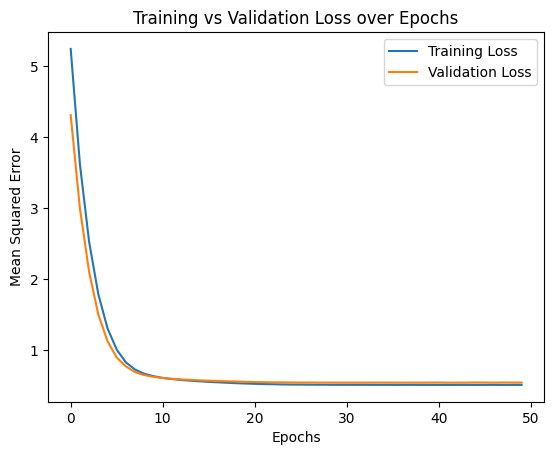

In [54]:
# Step 6: Visualize Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


In [55]:
# Step 7: Implement Early Stopping (optional but recommended)
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train_scaled, y_train,
    epochs=50,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5384 - mae: 0.5397 - val_loss: 0.5457 - val_mae: 0.5372
Epoch 2/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5006 - mae: 0.5201 - val_loss: 0.5452 - val_mae: 0.5392
Epoch 3/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5037 - mae: 0.5257 - val_loss: 0.5455 - val_mae: 0.5393
Epoch 4/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5237 - mae: 0.5343 - val_loss: 0.5447 - val_mae: 0.5380
Epoch 5/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5074 - mae: 0.5234 - val_loss: 0.5442 - val_mae: 0.5385
Epoch 6/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5171 - mae: 0.5312 - val_loss: 0.5445 - val_mae: 0.5399
Epoch 7/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5181 - mae: 0.5306 - val_loss: 0.5441 - val_mae: 0.5394
Epoch 8/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.5069 - mae: 0.5236 - val_loss: 0.5448 - val_mae: 0.5387
Epoch 9/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

**Step 8: Evaluate the model**

In this phase, the trained TensorFlow linear regression model is evaluated on the test data to measure its predictive performance. Key metrics such as MSE, RMSE, MAE, and R² score are calculated to quantify the model’s accuracy and error. Predictions on the test set are also generated, providing insight into how well the model generalizes to unseen data.

In [56]:
# Evaluate model on test data
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)

# Make predictions
y_pred_tf = model.predict(X_test_scaled).flatten()

# Calculate metrics
mse = mean_squared_error(y_test, y_pred_tf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_tf)
r2 = r2_score(y_test, y_pred_tf)

# Display results
print("Model Evaluation Results:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Model Evaluation Results:
Mean Squared Error (MSE): 0.5540
Root Mean Squared Error (RMSE): 0.7443
Mean Absolute Error (MAE): 0.5344
R² Score: 0.5773


**Step 9:- Make Predicitions**

This code visualizes the model’s performance by plotting the actual vs. predicted median house values. The scatter plot helps assess how closely the predictions align with the true values, providing an intuitive view of the model’s accuracy and any potential deviations or patterns in the predictions.

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


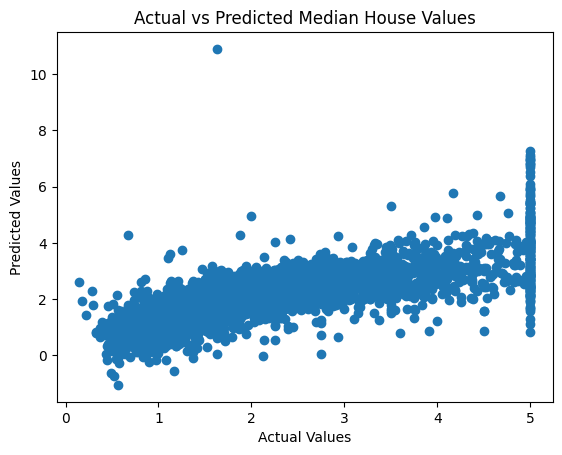

In [57]:

y_pred = model.predict(X_test_scaled)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Median House Values")
plt.show()


We implemented Linear Regression on the California Housing dataset using Scikit-learn and TensorFlow. Scikit-learn provided a simple, quick, and interpretable approach to train and evaluate the model, while TensorFlow allowed building a neural network-based linear model with customizable training, validation split, and epoch-based learning. Both approaches produced similar results, with TensorFlow offering flexibility for scaling to more complex models in the future.